# 1.DataFrame

## 1.1从RDD创建DataFrame

In [1]:
RawUerRDD = sc.textFile("inputData/u.user")

In [2]:
RawUerRDD.first()

'1|24|M|technician|85711'

In [3]:
userRDD = RawUerRDD.map(lambda x:x.split("|"))

In [5]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate()

In [7]:
from pyspark.sql import  Row

In [9]:
user_Rows = userRDD.map(lambda x:Row(userid=int(x[0]),age=int(x[1]),gender=x[2],occupation=x[3],zipcode=x[4]))
user_Rows.take(2)

[Row(age=24, gender='M', occupation='technician', userid=1, zipcode='85711'),
 Row(age=53, gender='F', occupation='other', userid=2, zipcode='94043')]

In [11]:
user_df = spark.createDataFrame(user_Rows)
user_df.printSchema()

root
 |-- age: long (nullable = true)
 |-- gender: string (nullable = true)
 |-- occupation: string (nullable = true)
 |-- userid: long (nullable = true)
 |-- zipcode: string (nullable = true)



In [13]:
df = user_df.alias("df")

In [14]:
df.show()

+---+------+-------------+------+-------+
|age|gender|   occupation|userid|zipcode|
+---+------+-------------+------+-------+
| 24|     M|   technician|     1|  85711|
| 53|     F|        other|     2|  94043|
| 23|     M|       writer|     3|  32067|
| 24|     M|   technician|     4|  43537|
| 33|     F|        other|     5|  15213|
| 42|     M|    executive|     6|  98101|
| 57|     M|administrator|     7|  91344|
| 36|     M|administrator|     8|  05201|
| 29|     M|      student|     9|  01002|
| 53|     M|       lawyer|    10|  90703|
| 39|     F|        other|    11|  30329|
| 28|     F|        other|    12|  06405|
| 47|     M|     educator|    13|  29206|
| 45|     M|    scientist|    14|  55106|
| 49|     F|     educator|    15|  97301|
| 21|     M|entertainment|    16|  10309|
| 30|     M|   programmer|    17|  06355|
| 35|     F|        other|    18|  37212|
| 40|     M|    librarian|    19|  02138|
| 42|     F|    homemaker|    20|  95660|
+---+------+-------------+------+-

In [15]:
user_df.createOrReplaceTempView("user_table")

In [17]:
spark.sql("select * from user_table limit 5").show()

+---+------+----------+------+-------+
|age|gender|occupation|userid|zipcode|
+---+------+----------+------+-------+
| 24|     M|technician|     1|  85711|
| 53|     F|     other|     2|  94043|
| 23|     M|    writer|     3|  32067|
| 24|     M|technician|     4|  43537|
| 33|     F|     other|     5|  15213|
+---+------+----------+------+-------+



## 1.2选取部分字段

In [20]:
user_df.select("userid","occupation","gender","age").show(5)

+------+----------+------+---+
|userid|occupation|gender|age|
+------+----------+------+---+
|     1|technician|     M| 24|
|     2|     other|     F| 53|
|     3|    writer|     M| 23|
|     4|technician|     M| 24|
|     5|     other|     F| 33|
+------+----------+------+---+
only showing top 5 rows



In [22]:
spark.sql("select userid,occupation,gender,age from user_table").show(5)

+------+----------+------+---+
|userid|occupation|gender|age|
+------+----------+------+---+
|     1|technician|     M| 24|
|     2|     other|     F| 53|
|     3|    writer|     M| 23|
|     4|technician|     M| 24|
|     5|     other|     F| 33|
+------+----------+------+---+
only showing top 5 rows



In [28]:
type(user_df["userid"])

pyspark.sql.column.Column

## 1.3增加计算字段

In [29]:
df.select("userid","occupation","gender",2016-df.age).show()

+------+-------------+------+------------+
|userid|   occupation|gender|(2016 - age)|
+------+-------------+------+------------+
|     1|   technician|     M|        1992|
|     2|        other|     F|        1963|
|     3|       writer|     M|        1993|
|     4|   technician|     M|        1992|
|     5|        other|     F|        1983|
|     6|    executive|     M|        1974|
|     7|administrator|     M|        1959|
|     8|administrator|     M|        1980|
|     9|      student|     M|        1987|
|    10|       lawyer|     M|        1963|
|    11|        other|     F|        1977|
|    12|        other|     F|        1988|
|    13|     educator|     M|        1969|
|    14|    scientist|     M|        1971|
|    15|     educator|     F|        1967|
|    16|entertainment|     M|        1995|
|    17|   programmer|     M|        1986|
|    18|        other|     F|        1981|
|    19|    librarian|     M|        1976|
|    20|    homemaker|     F|        1974|
+------+---

In [33]:
df.select("userid","occupation","gender",(2016-df.age).alias("birthday")).show()

+------+-------------+------+--------+
|userid|   occupation|gender|birthday|
+------+-------------+------+--------+
|     1|   technician|     M|    1992|
|     2|        other|     F|    1963|
|     3|       writer|     M|    1993|
|     4|   technician|     M|    1992|
|     5|        other|     F|    1983|
|     6|    executive|     M|    1974|
|     7|administrator|     M|    1959|
|     8|administrator|     M|    1980|
|     9|      student|     M|    1987|
|    10|       lawyer|     M|    1963|
|    11|        other|     F|    1977|
|    12|        other|     F|    1988|
|    13|     educator|     M|    1969|
|    14|    scientist|     M|    1971|
|    15|     educator|     F|    1967|
|    16|entertainment|     M|    1995|
|    17|   programmer|     M|    1986|
|    18|        other|     F|    1981|
|    19|    librarian|     M|    1976|
|    20|    homemaker|     F|    1974|
+------+-------------+------+--------+
only showing top 20 rows



In [35]:
spark.sql("select userid,occupation,gender,2016-age as birthday from user_table").show(5)

+------+----------+------+--------+
|userid|occupation|gender|birthday|
+------+----------+------+--------+
|     1|technician|     M|    1992|
|     2|     other|     F|    1963|
|     3|    writer|     M|    1993|
|     4|technician|     M|    1992|
|     5|     other|     F|    1983|
+------+----------+------+--------+
only showing top 5 rows



## 1.4筛选数据

In [42]:
user_df.filter((user_df["occupation"]=="technician") & (user_df["gender"]=="M")&(user_df["age"]==24)).show(5)

+---+------+----------+------+-------+
|age|gender|occupation|userid|zipcode|
+---+------+----------+------+-------+
| 24|     M|technician|     1|  85711|
| 24|     M|technician|     4|  43537|
| 24|     M|technician|   456|  31820|
| 24|     M|technician|   717|  84105|
| 24|     M|technician|   832|  77042|
+---+------+----------+------+-------+
only showing top 5 rows



In [45]:
spark.sql("select * from user_table where occupation='technician' and gender='M' and age=24").show(5)

+---+------+----------+------+-------+
|age|gender|occupation|userid|zipcode|
+---+------+----------+------+-------+
| 24|     M|technician|     1|  85711|
| 24|     M|technician|     4|  43537|
| 24|     M|technician|   456|  31820|
| 24|     M|technician|   717|  84105|
| 24|     M|technician|   832|  77042|
+---+------+----------+------+-------+
only showing top 5 rows



## 1.5单个字段排序

In [46]:
spark.sql("select * from user_table order by age desc").show(5)

+---+------+-------------+------+-------+
|age|gender|   occupation|userid|zipcode|
+---+------+-------------+------+-------+
| 73|     M|      retired|   481|  37771|
| 70|     M|     engineer|   767|  00000|
| 70|     F|      retired|   860|  48322|
| 70|     M|administrator|   803|  78212|
| 69|     M|    executive|   559|  10022|
+---+------+-------------+------+-------+
only showing top 5 rows



In [48]:
user_df.select("userid","occupation","gender","age").orderBy("age",ascending=0).show()

+------+-------------+------+---+
|userid|   occupation|gender|age|
+------+-------------+------+---+
|   481|      retired|     M| 73|
|   767|     engineer|     M| 70|
|   803|administrator|     M| 70|
|   860|      retired|     F| 70|
|   559|    executive|     M| 69|
|   585|    librarian|     M| 69|
|   573|      retired|     M| 68|
|   349|      retired|     M| 68|
|   211|     salesman|     M| 66|
|   564|      retired|     M| 65|
|   651|      retired|     M| 65|
|   318|      retired|     M| 65|
|   423|        other|     M| 64|
|   845|       doctor|     M| 64|
|   858|     educator|     M| 63|
|   777|   programmer|     M| 63|
|   364|     engineer|     M| 63|
|   520|   healthcare|     M| 62|
|   266|administrator|     F| 62|
|   934|     engineer|     M| 61|
+------+-------------+------+---+
only showing top 20 rows



In [49]:
user_df.select("userid","occupation","gender","age").orderBy(df.age.desc()).show()

+------+-------------+------+---+
|userid|   occupation|gender|age|
+------+-------------+------+---+
|   481|      retired|     M| 73|
|   803|administrator|     M| 70|
|   767|     engineer|     M| 70|
|   860|      retired|     F| 70|
|   559|    executive|     M| 69|
|   585|    librarian|     M| 69|
|   349|      retired|     M| 68|
|   573|      retired|     M| 68|
|   211|     salesman|     M| 66|
|   651|      retired|     M| 65|
|   564|      retired|     M| 65|
|   318|      retired|     M| 65|
|   845|       doctor|     M| 64|
|   423|        other|     M| 64|
|   364|     engineer|     M| 63|
|   858|     educator|     M| 63|
|   777|   programmer|     M| 63|
|   266|administrator|     F| 62|
|   520|   healthcare|     M| 62|
|   351|     educator|     M| 61|
+------+-------------+------+---+
only showing top 20 rows



## 1.6多个字段排序

In [51]:
spark.sql("select * from user_table order by age desc,gender").show(5)

+---+------+-------------+------+-------+
|age|gender|   occupation|userid|zipcode|
+---+------+-------------+------+-------+
| 73|     M|      retired|   481|  37771|
| 70|     F|      retired|   860|  48322|
| 70|     M|administrator|   803|  78212|
| 70|     M|     engineer|   767|  00000|
| 69|     M|    executive|   559|  10022|
+---+------+-------------+------+-------+
only showing top 5 rows



In [53]:
df.select("userid","occupation","age","gender").orderBy(["age","gender"],ascending=[0,1]).show(5)

+------+-------------+---+------+
|userid|   occupation|age|gender|
+------+-------------+---+------+
|   481|      retired| 73|     M|
|   860|      retired| 70|     F|
|   803|administrator| 70|     M|
|   767|     engineer| 70|     M|
|   559|    executive| 69|     M|
+------+-------------+---+------+
only showing top 5 rows



## 1.7显示不重复的数据

In [54]:
spark.sql("select distinct age,gender from user_table").show(5)

+---+------+
|age|gender|
+---+------+
| 39|     F|
| 48|     M|
| 26|     M|
| 28|     M|
| 54|     M|
+---+------+
only showing top 5 rows



In [55]:
user_df.select("age","gender").distinct().show(5)

+---+------+
|age|gender|
+---+------+
| 39|     F|
| 48|     M|
| 26|     M|
| 28|     M|
| 54|     M|
+---+------+
only showing top 5 rows



## 1.8分组统计数据

In [56]:
spark.sql("select gender,count(*) as count from user_table group by gender").show(5)

+------+-----+
|gender|count|
+------+-----+
|     F|  273|
|     M|  670|
+------+-----+



In [60]:
user_df.select("gender").groupBy("gender").agg({"gender":"count"}).show()

+------+-------------+
|gender|count(gender)|
+------+-------------+
|     F|          273|
|     M|          670|
+------+-------------+



## 1.9Join连接数据

In [61]:
zipcode = spark.read.format("csv").option("delimiter",",").option("header","true").load("inputData/free-zipcode-database-Primary.csv")

In [69]:
zipcode_data = zipcode.select("City","State","ZipCodeType",zipcode["Zipcode"].cast("long"))

In [70]:
zipcode_data.printSchema()

root
 |-- City: string (nullable = true)
 |-- State: string (nullable = true)
 |-- ZipCodeType: string (nullable = true)
 |-- Zipcode: long (nullable = true)



In [71]:
zipcode_data.createOrReplaceTempView("zipcode_table")

In [74]:
spark.sql("select u.*,z.City,z.State from user_table u left join zipcode_table z on u.zipcode=z.Zipcode where z.State='NY'").show(5)

+---+------+-------------+------+-------+-------------+-----+
|age|gender|   occupation|userid|zipcode|         City|State|
+---+------+-------------+------+-------+-------------+-----+
| 21|     M|entertainment|    16|  10309|STATEN ISLAND|   NY|
| 24|     M|       artist|    31|  10003|     NEW YORK|   NY|
| 45|     M|administrator|    48|  12550|     NEWBURGH|   NY|
| 49|     F|    librarian|    88|  11701|   AMITYVILLE|   NY|
| 31|     M|administrator|    95|  10707|     TUCKAHOE|   NY|
+---+------+-------------+------+-------+-------------+-----+
only showing top 5 rows



In [75]:
spark.sql("select z.State,count(*) from user_table u left join zipcode_table z on z.Zipcode=u.zipcode group by z.state").show()

+-----+--------+
|State|count(1)|
+-----+--------+
|   AZ|      14|
|   SC|      11|
|   LA|       6|
|   MN|      78|
|   NJ|      18|
|   DC|      14|
|   OR|      20|
|   VA|      27|
| null|      35|
|   RI|       3|
|   KY|      11|
|   WY|       1|
|   NH|       6|
|   MI|      23|
|   NV|       3|
|   WI|      22|
|   ID|       7|
|   CA|     116|
|   CT|      17|
|   NE|       6|
+-----+--------+
only showing top 20 rows



In [80]:
joined_df = user_df.join(zipcode_data,user_df.zipcode==zipcode_data.Zipcode,how="left_outer")

In [81]:
joined_df.printSchema()

root
 |-- age: long (nullable = true)
 |-- gender: string (nullable = true)
 |-- occupation: string (nullable = true)
 |-- userid: long (nullable = true)
 |-- zipcode: string (nullable = true)
 |-- City: string (nullable = true)
 |-- State: string (nullable = true)
 |-- ZipCodeType: string (nullable = true)
 |-- Zipcode: long (nullable = true)



In [79]:
joined_df.show()

+---+------+-------------+------+-------+---------------+-----+-----------+-------+
|age|gender|   occupation|userid|zipcode|           City|State|ZipCodeType|Zipcode|
+---+------+-------------+------+-------+---------------+-----+-----------+-------+
| 24|     M|   technician|     1|  85711|         TUCSON|   AZ|   STANDARD|  85711|
| 53|     F|        other|     2|  94043|  MOUNTAIN VIEW|   CA|   STANDARD|  94043|
| 23|     M|       writer|     3|  32067|    ORANGE PARK|   FL|     PO BOX|  32067|
| 24|     M|   technician|     4|  43537|         MAUMEE|   OH|   STANDARD|  43537|
| 33|     F|        other|     5|  15213|     PITTSBURGH|   PA|   STANDARD|  15213|
| 42|     M|    executive|     6|  98101|        SEATTLE|   WA|   STANDARD|  98101|
| 57|     M|administrator|     7|  91344|  GRANADA HILLS|   CA|   STANDARD|  91344|
| 36|     M|administrator|     8|  05201|     BENNINGTON|   VT|   STANDARD|   5201|
| 29|     M|      student|     9|  01002|        AMHERST|   MA|   STANDARD| 

In [82]:
GroupByState = joined_df.groupBy("State").count()

In [84]:
GroupByState.show()

+-----+-----+
|State|count|
+-----+-----+
|   AZ|   14|
|   SC|   11|
|   LA|    6|
|   MN|   78|
|   NJ|   18|
|   DC|   14|
|   OR|   20|
|   VA|   27|
| null|   35|
|   RI|    3|
|   KY|   11|
|   WY|    1|
|   NH|    6|
|   MI|   23|
|   NV|    3|
|   WI|   22|
|   ID|    7|
|   CA|  116|
|   CT|   17|
|   NE|    6|
+-----+-----+
only showing top 20 rows



In [85]:
GroupByState.toPandas()

,State,count
0,AZ,14
1,SC,11
2,LA,6
3,MN,78
4,NJ,18
5,DC,14
6,OR,20
7,VA,27
8,None,35
9,RI,3


In [86]:
GroupByState_pd = GroupByState.toPandas()

In [93]:
import matplotlib.pyplot as plt
import numpy as np

<BarContainer object of 54 artists>

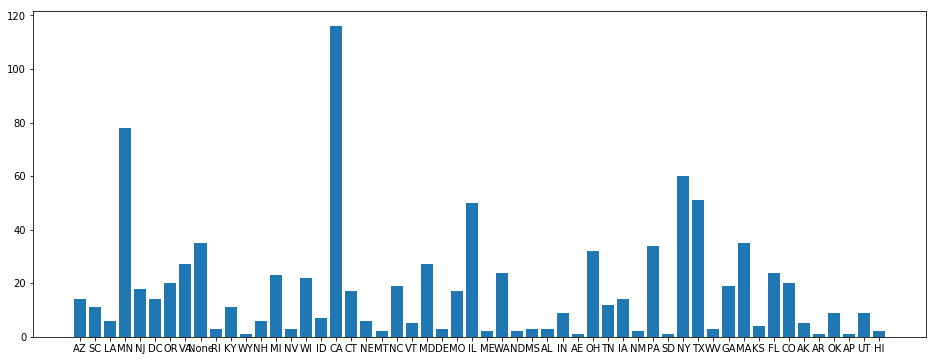

In [100]:
fig,ax = plt.subplots(figsize=(16,6))
plt.bar(np.arange(len(GroupByState_pd.State)),GroupByState_pd["count"],tick_label=GroupByState_pd.State)

# 2.Pipeline多元分类

In [107]:
rawWithHerader = sc.textFile("inputData/covtype.data")

In [2]:
raw_df = spark.read.format("csv").option("header","false").option("delimiter",",").load("inputData/covtype.data")

In [3]:
from pyspark.sql.functions import col
df = raw_df.select([col(column).cast("double") for column in raw_df.columns])

In [4]:
df.printSchema()

root
 |-- _c0: double (nullable = true)
 |-- _c1: double (nullable = true)
 |-- _c2: double (nullable = true)
 |-- _c3: double (nullable = true)
 |-- _c4: double (nullable = true)
 |-- _c5: double (nullable = true)
 |-- _c6: double (nullable = true)
 |-- _c7: double (nullable = true)
 |-- _c8: double (nullable = true)
 |-- _c9: double (nullable = true)
 |-- _c10: double (nullable = true)
 |-- _c11: double (nullable = true)
 |-- _c12: double (nullable = true)
 |-- _c13: double (nullable = true)
 |-- _c14: double (nullable = true)
 |-- _c15: double (nullable = true)
 |-- _c16: double (nullable = true)
 |-- _c17: double (nullable = true)
 |-- _c18: double (nullable = true)
 |-- _c19: double (nullable = true)
 |-- _c20: double (nullable = true)
 |-- _c21: double (nullable = true)
 |-- _c22: double (nullable = true)
 |-- _c23: double (nullable = true)
 |-- _c24: double (nullable = true)
 |-- _c25: double (nullable = true)
 |-- _c26: double (nullable = true)
 |-- _c27: double (nullable = tru

In [116]:
headlst = []
for i in range(55):
    headlst.append("f"+str(i))

In [5]:
df = df.select([col("_c"+str(i)).alias("f"+str(i)) for i in range(len(df.columns))])

In [6]:
df = df.withColumn("label",df["f54"]-1).drop("f54")

In [7]:
train_df,test_df = df.randomSplit([0.7,0.3])

In [8]:
train_df.cache()
test_df.cache()

DataFrame[f0: double, f1: double, f2: double, f3: double, f4: double, f5: double, f6: double, f7: double, f8: double, f9: double, f10: double, f11: double, f12: double, f13: double, f14: double, f15: double, f16: double, f17: double, f18: double, f19: double, f20: double, f21: double, f22: double, f23: double, f24: double, f25: double, f26: double, f27: double, f28: double, f29: double, f30: double, f31: double, f32: double, f33: double, f34: double, f35: double, f36: double, f37: double, f38: double, f39: double, f40: double, f41: double, f42: double, f43: double, f44: double, f45: double, f46: double, f47: double, f48: double, f49: double, f50: double, f51: double, f52: double, f53: double, label: double]

In [9]:
from pyspark.ml import Pipeline
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.classification import DecisionTreeClassifier

In [10]:
assembler = VectorAssembler(inputCols=df.columns[:54],outputCol="features")

In [11]:
dt = DecisionTreeClassifier(labelCol="label",featuresCol="features")

In [12]:
pipeline = Pipeline(stages=[assembler,dt])

In [13]:
pipelineModel = pipeline.fit(train_df)
preiction = pipelineModel.transform(test_df)

In [14]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

In [15]:
evaluator = MulticlassClassificationEvaluator(labelCol="label",predictionCol="prediction",metricName="accuracy")

In [16]:
evaluator.evaluate(preiction)

0.7000691677575356

In [21]:
from pyspark.ml.tuning import CrossValidator,ParamGridBuilder,TrainValidationSplit

In [22]:
paraGrid = ParamGridBuilder().addGrid(dt.impurity,["gini","entropy"]).addGrid(dt.maxDepth,[10,15,25]).addGrid(dt.maxBins,[30,40,50]).build()

In [23]:
tvs = TrainValidationSplit(estimator=dt,estimatorParamMaps=paraGrid,evaluator=evaluator,trainRatio=0.8)

In [24]:
tvs_pipeline = Pipeline(stages=[assembler,tvs])

In [ ]:
tvs_pipelineModel = tvs_pipeline.fit(train_df)